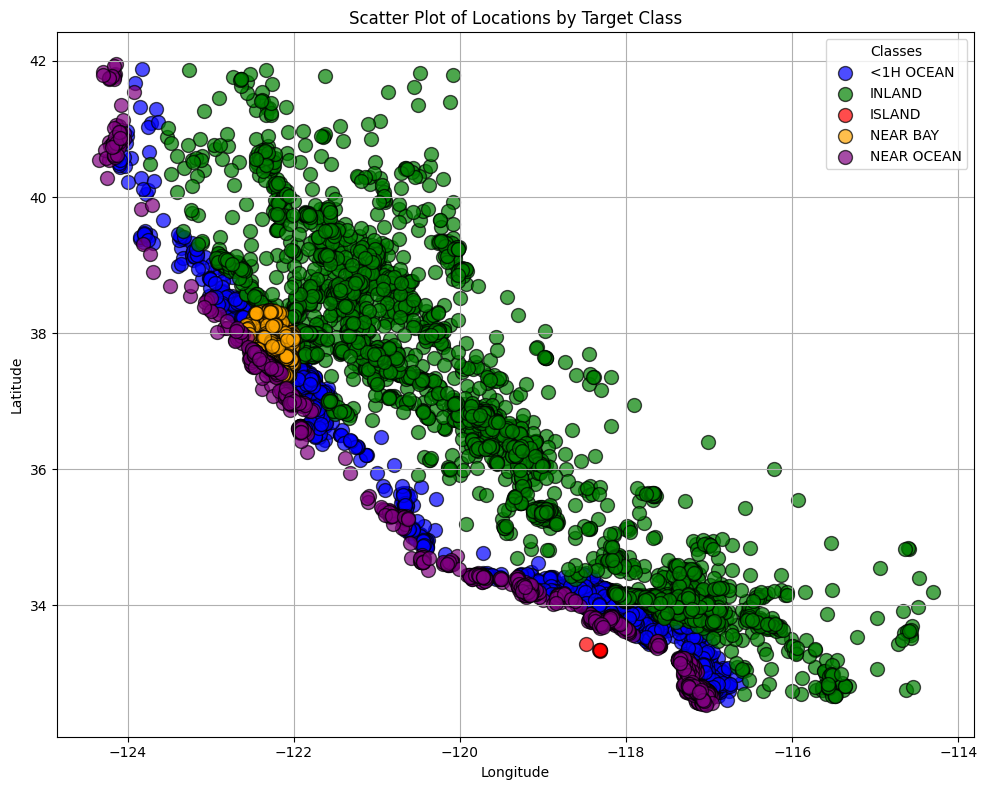

In [10]:
from lbm.datasets.housing_locations import Preprocessor
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

processor = Preprocessor(include_all_labels=True, batch_size=64)
train_loader, val_loader, test_loader = processor.get_loaders()

feature_names = processor.get_feature_names()
label_names = processor.get_label_names()

all_features = []
all_targets = []

for features, targets in train_loader:
    features_np = features.numpy()
    targets_np = targets.numpy()
    
    all_features.append(features_np)
    all_targets.append(targets_np)

all_features = np.concatenate(all_features, axis=0)  # Shape: (N, 2)
all_targets = np.concatenate(all_targets, axis=0)      # Shape: (N, 5)

class_indices = np.argmax(all_targets, axis=1)

class_names = processor.get_label_names()

colors = ['blue', 'green', 'red', 'orange', 'purple']

plt.figure(figsize=(10, 8))
for class_idx, class_name in enumerate(class_names):
    # Select points corresponding to the current class
    idx = (class_indices == class_idx)
    latitudes = all_features[idx, 0]
    longitudes = all_features[idx, 1]
    
    # Plot these points
    plt.scatter(latitudes, longitudes, color=colors[class_idx], label=class_name,
                alpha=0.7, edgecolors='k', s=100)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Locations by Target Class')
plt.legend(title="Classes")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
from lbm.models.mlp import DenseClassifier
from lbm.workflow import train_and_validate
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np
from lbm.workflow import avg_accuracy

def validate_dense_model(hidden_layers, epochs):
    dropout = 0.0
    weight_decay = 0.0
    print(dropout)
    model = DenseClassifier(
        len(feature_names),
        hidden_layers, 
        len(label_names), 
        dropout=dropout
    )

    optimizer = optim.SGD(model.parameters(), weight_decay=weight_decay)
    loss_fn = nn.CrossEntropyLoss()
    train_losses, val_losses = train_and_validate(
        model,
        train_loader,
        val_loader,
        optimizer,
        loss_fn,
        epochs=epochs
    )
    plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Training', color='blue')
    plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label='Validation', color='orange')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    accuracy = avg_accuracy(model, val_loader)
    print(f'Accuracy: {accuracy:.2%}')
    return accuracy


0.0


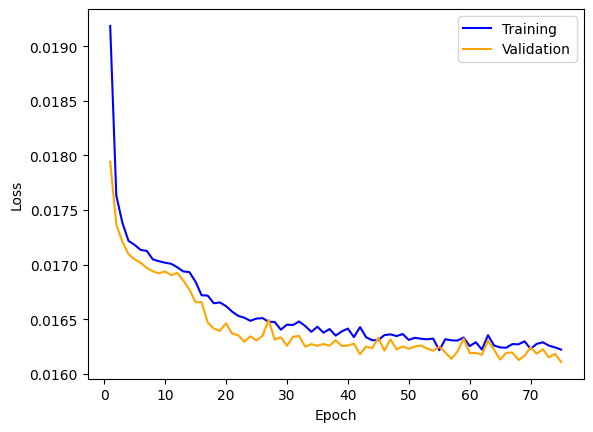

Accuracy: 87.27%


0.8727361559867859

In [12]:
validate_dense_model([1024, 1024], 75)

0.0


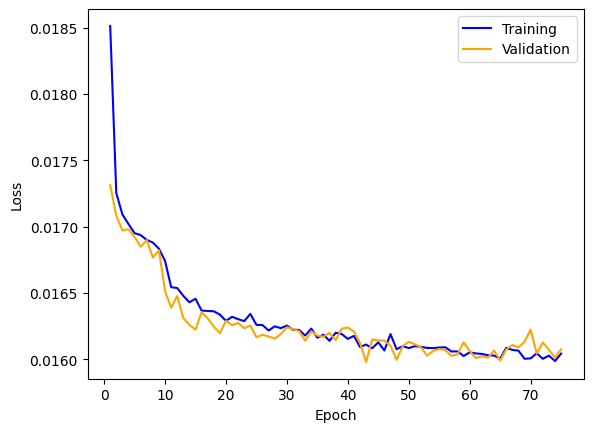

Accuracy: 87.81%


0.8781204223632812

In [13]:
validate_dense_model([1024, 1024, 1024], 75)

0.0


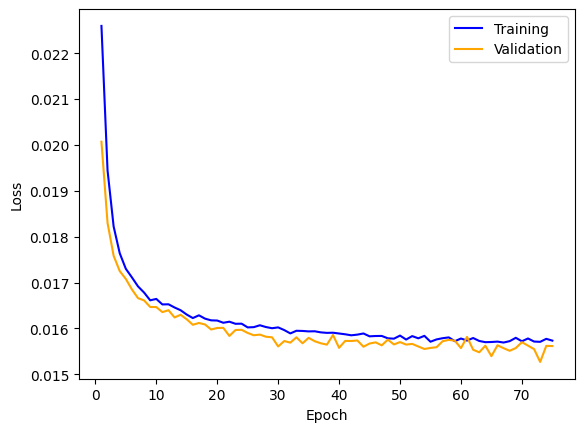

Accuracy: 90.80%


0.9079784750938416

In [14]:
validate_dense_model([128] * 10, 75)

0.0


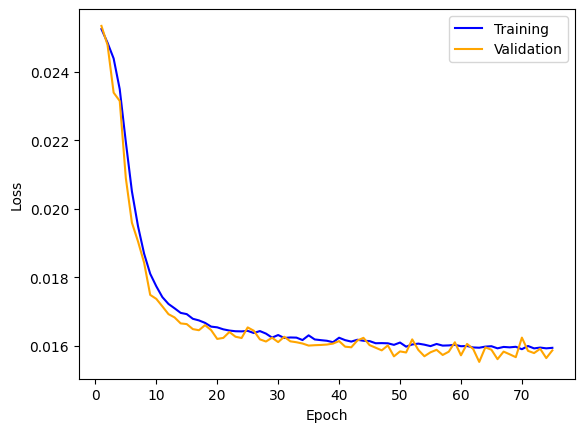

Accuracy: 89.18%


0.8918257355690002

In [15]:
validate_dense_model([64] * 20, 75)

0.0


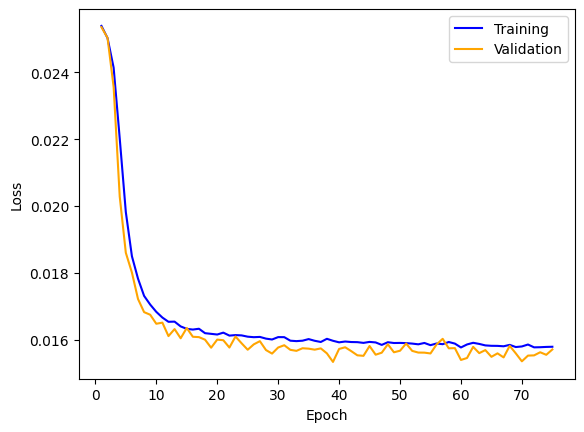

Accuracy: 90.46%


0.9045521020889282

In [16]:
validate_dense_model([128] * 20, 75)